# Introduction
Hi! And welcome to our webside. Today we will explore trees in Copenhagen. More precisely, we want to investigate if the municipality of Copenhagen is fulfilling the following two principles of their tree policy:
1. There must be planted more trees in Copenhagen 
2. There should be a large variation in tree species in Copenhagen 

As you probably agree on, it is lovely to live in a neighbourhood with green environments. During spring, the trees get green leaves reminding us all that summer is near. During summer, the trees are producing fruits and creating shadow from the sun. In autumn, the leaves are getting coloured, and in the winter, they are decorated for christmas. Overall, trees bring so must joy and groud for playing.
Besides the value that trees create for the people, trees are creating important value for the environment by reducing CO2, improving air quality and purifying water. 

Hence we want to make sure that the municipality of Copenhagen is planting more trees and increasing the variation in species as their policy mention. Also, we want to investigate if there is a difference in where the municipality are planting trees? Is there more focus on some distrcits than other? And if so, what might be the reason for that? 

Those are some of the questions we are seeking to answer today. Lets go and explore! 

# More trees planted over the years?
We will start by investigating the first principle: are the municipality of Copenhagen planting more trees? 

First let's have a look at the total number of trees planted in Copenhagen from 2000 to 2020. 

In [36]:
## Packages 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import folium
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# For bokeh visualisations
from bokeh.plotting import figure
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import show, output_notebook, reset_output
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.layouts import row
# For heatmaps
from folium.plugins import HeatMapWithTime

In [3]:
# load tree data 
df = pd.read_csv("data/df_tree.csv")
df.year = df.year.apply(int)
df.id = df.id.astype("category")

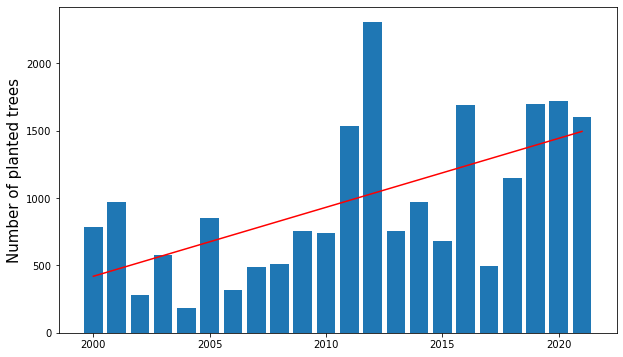

In [5]:
df_year = df.groupby(['year']).size() # get number of trees planted per year 
slope, intercept, r_value, p_value, std_err = stats.linregress(df_year.index.to_list(),df_year.values) # for trend curve

# plot 
plt.figure(figsize=(10,6))
plt.bar(df_year.index,df_year.values)
plt.plot(df_year.index, slope*(df_year.index) + intercept, 'r-')
plt.ylabel('Number of planted trees',fontsize=15)
plt.show()

In general, it appears that there is an upward trend in the number of trees planted in Copenhagen from 2000 to 2020. The red curve showing the linear trend is definetely having a positive slope! 

However, the blue bars show that there is much variation in the number of trees planted from year to year. For instance, the number of trees planted in 2012 is especially high and the number of trees planted in 2017 is low.  

Let's now have a look at the number of trees planted over time in the different districts of Copenhagen. 

In [15]:
# Line plot showing trees planted per km2 in each district from 2000 to 2021 
df_genial = pd.read_csv('data/df_genial.csv')
df_grøn = df_genial[['year','district','trees_km2']]
df_km2_year = pd.pivot_table(df_grøn, values='trees_km2', index='year', columns=['district'], fill_value=0)


df_districts = df.groupby(["year", "district"]).size().reset_index()
districts = df_districts.district.unique()

# BOKEH 
reset_output() # If you are having issues with visualizing Bokeh plots in the notebook try to uncomment this line
# prepare data for bokeh plot
#Create empty figures

p1 = figure(plot_width = 900, plot_height = 500, title = "Number of trees planted per km2 for each district", 
            x_axis_label = "Year", y_axis_label = "Number of trees per km2") 


#colors
colors = ["red", "blue", "green", "cyan", "black", "darkblue", "magenta", "yellow", "orange", "grey"]
#Create empty list for custom legend
items1 = []

#Add line by using p.line
line ={}
# Pivot table for number of unique species in each district over the years 
df_km2_year = pd.pivot_table(df_grøn, values='trees_km2', index='year', columns=['district'], fill_value=0)

# Insert fraction values in bars
for indx, i in enumerate(districts):
    line[indx] = p1.line(x=df_km2_year.index, y = df_km2_year[i], width=1.5, color = colors[indx], muted =True)
    #Append items to create the legend
    items1.append((districts[indx], [line[indx]]))


#This is to manage the legend in plot
#add the legend outside the plot
legend = Legend(items=items1, location="top_left")
p1.add_layout(legend, 'left')

p1.legend.click_policy = "mute" #you can also try "hide"
p1.title.text_font_size = "20px"


output_notebook()
show(p1)

Loading BokehJS ...

Try to click on one (or more) of the districts on the above figure. At the figure, the number of trees planted is normalised using the area size of the district such that we are looking at the number of trees planted per km2. 

This visualisation suggests, that there might be a difference in the number of trees planted between the districts. Try for example to compare Nørrebro and Østerbro with Amager Vest, Amager Øst and Brønshøj-Husum. What is happening around 2007? 

Let's look at it with some stats. 

<!-- Overall, the visualisation show that the number of planted trees per km2 fluctuates a lot between the years for each district why it can be difficult to determine the trend. However, it is clear that the variation in the number of trees planted per km2 between the districts is increasing after ~2007. While looking at the curves after 2007, this visualisation suggests that there might be a difference in the number of trees planted per km2 between some of the districts. Try to click on Østerbro and Nørrebro and see that the number of trees planted per km2 is increasing around 2007/2008 and with large spikes in 2012, 2016 and 2020/2021. 
Also, some of the districts seem to have only a small increase in the number of trees being planted. Try to click on 'Amager Vest', 'Amager Øst' and 'Brønshøj-Husum'. These districts appears to have a smaller upward trend and no large spikes such as 'Nørrebro' and 'Amager Vest'.
--> 


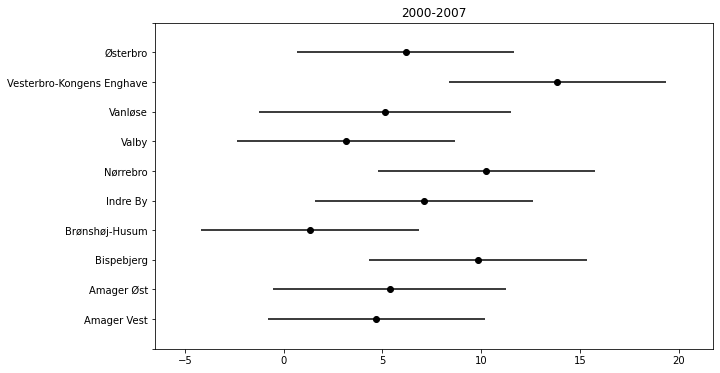

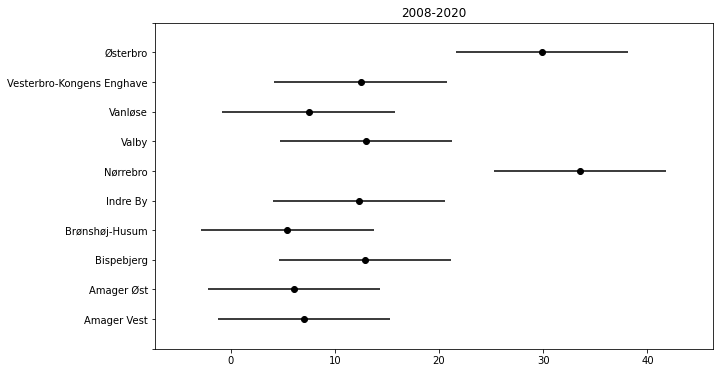

In [34]:
# Turkey's pairwise test to compare means before and after 2007 
df_p1 = df_genial[df_genial['year'].isin([2000,2001,2002,2003,2004,2005,2006,2007])]
df_p2 = df_genial[df_genial['year'].isin([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])]
tukey_p1 = pairwise_tukeyhsd(endog=df_p1['trees_km2'], groups=df_p1['district'], alpha=0.05)
tukey_p2 = pairwise_tukeyhsd(endog=df_p2['trees_km2'], groups=df_p2['district'], alpha=0.05)

tukey_p1.plot_simultaneous()
plt.title('2000-2007')
tukey_p2.plot_simultaneous()
plt.title('2008-2020')
plt.show()

The above two plots show a pairwise statistical comparison of group means, where the group means in this case corresponds to the average number of planted trees per km2 for the districts. 

The black dots represent the group means while the bar length represents the 95%-confidence interval for the group mean. Two districts are not significantly different in mean value if their bars overlap. On the other hand, if the bars of two districts do not overlap, the difference in mean value is statistically significant. 

Hence it is seen that the average number of planted trees per km2 is not significantly different between any districts when looking at data from the period 2000-2007. However, when looking at the period from 2008 and onwards, the average number of trees planted per km2 is significantly larger for the two districts Nørrebro and Østerbro compared to the other 8 districts. 

At the below heatmaps, we will dig into where the trees are planted in Østerbro and Nørrebro after 2007 - is it on the streets or in parks? 

In [41]:
# Heat map showing planted 
df_heatmap = df[df['year']>2007]
df_heatmap_nørrebro = df_heatmap[df_heatmap['district'] == 'Nørrebro']

heat_data = pd.DataFrame()
heat_data[['Y','X', "Weight"]] = df_heatmap_nørrebro[['Y','X', "year"]]
heat_data['Weight'] = heat_data['Weight'].astype(float)
heat_data = heat_data.dropna(axis=0, subset=['Y','X', 'Weight'])
heat_data = [[[row['Y'],row['X']] for index, row in heat_data[heat_data['Weight'] == i].iterrows()] for i in range(2008,2021)]

# gps coordinates for Nørrebros runddel 
lat = 55.692108154296875
lon = 12.552446365356445
map = folium.Map(location=[lat, lon],zoom_start = 14)
hm = HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map)
map

2012: stop at 5, trees planted in mimersparken and superkilen. 
Mimersparken: park mellem Bispebjerg station og mjølnerparken. Åbnet i 2012. https://da.wikipedia.org/wiki/Mimersparken
Superkilen: park mellem Mimersgade og Tagensvej, åbnet i 2012. https://da.wikipedia.org/wiki/Superkilen

From 2016 and onwards, the trees seem to be spread out on the streets and not just in parks. 

In [46]:
df_heatmap_østerbro = df_heatmap[df_heatmap['district'] == 'Østerbro']

heat_data = pd.DataFrame()
heat_data[['Y','X', "Weight"]] = df_heatmap_østerbro[['Y','X', "year"]]
heat_data['Weight'] = heat_data['Weight'].astype(float)
heat_data = heat_data.dropna(axis=0, subset=['Y','X', 'Weight'])
heat_data = [[[row['Y'],row['X']] for index, row in heat_data[heat_data['Weight'] == i].iterrows()] for i in range(2008,2021)]

# Plot it on the map
lat = 55.7075777778
lon = 12.5688722222
map = folium.Map(location=[lat, lon],zoom_start = 13)
hm = HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map)
map

2012: stop at 5. Trees planted in Fælledparken and Klosterfælleden. 

In general lots of trees in Fælledparken but also spread out on streets especially after 2012. In 2015 and 2016 trees planted in Nordhavn!

Since it is nice to live in neighbourhoods with trees, green environments and parks .... rich people more trees? 

# More trees in rich district? 



# Large variation in tree species? 

Okay, now let's take a look at the tree species being planted in the districts. 


In [30]:
# Function to create a bar chart of top 10 species for each district in tabs.
def stacked_bar_chart(dataframe, title, use_district):
    # Find the specific district and remove non registered
    temp = dataframe.loc[df['district'] == use_district]
    temp = temp[temp.species != "Ikke registreret"]
    # Find top 10 species for the specific district
    temp2 = temp.groupby(["district", 'species']).size().sort_values(ascending=False)[0:10].reset_index(name='counts')
    temp3 = temp2.pivot_table('counts',["species"], 'district')
    temp3.columns = [''.join(col) for col in temp3.columns]
    temp3.rename(columns={use_district: "count"}, inplace = True)
    # Make it ready for bokeh plot
    temp3 = temp3.reset_index()
    temp3 = temp3.sort_values(by='count', ascending=False)
    
    # Convert pandas df to ColumnDataSource
    src = ColumnDataSource(temp3)
    
    #Create empty figures
    p = figure(plot_width = 900, plot_height = 500, title = title,
            x_axis_label = "species", y_axis_label = "n_samples", x_range= temp3["species"]) 


    #Define the columns to use for each bar
    bar_cols = ["count"]
    colors = ["red"]
    #Create empty list for custom legend
    items = []

    #Add bars by using p.var
    bar ={}
    # Insert fraction values in bars
    for indx, i in enumerate(bar_cols):
        bar[i] = p.vbar(x="species", top = i, source= src, width=0.5, color=colors[indx], muted =True)
        #Append items to create the legend
        items.append((bar_cols[indx], [bar[i]]))
    

    #This is to manage the legend in plot
    #p.legend.visible = True
    #add the legend outside the plot
    legend = Legend(items=items, location="top_left")
    p.add_layout(legend, "left")
    p.legend.click_policy = "mute" #you can also try "hide"

    return p

In [32]:
# Visualize all 10 district and the count of their top 10 species
tab1 = Panel(child=stacked_bar_chart(df, 'Number of samples by species', 'Amager Vest'), title="Amager Vest")
tab2 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Amager Øst'), title="Amager Øst")
tab3 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Bispebjerg'), title="Bispebjerg")
tab4 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Brønshøj-Husum'), title="Brønshøj-Husum")
tab5 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Indre By'), title="Indre By")
tab6 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Nørrebro'), title="Nørrebro")
tab7 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Valby'), title="Valby")
tab8 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Vanløse'), title="Vanløse")
tab9 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Vesterbro-Kongens Enghave'), title="Vesterbro-Kongens Enghave")
tab10 =Panel(child=stacked_bar_chart(df, 'Number of samples by species','Østerbro'), title="Østerbro")
tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4, tab5, tab6, tab7, tab8, tab9, tab10])
show(tabs)